# Compare embeddings

Generate figures for the thesis to show training progress of different embeddings

In [1]:
import pandas as pd
from ray.tune import ExperimentAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", palette=None, font_scale=1.1)

In [9]:
import glob

for f in glob.glob('../data/results/fine_tuning/**/ex*.json'):
    with open(f) as handle:
        q = handle.readlines()
    q = [i.replace('/raven/u/fgabler/master_thesis/bin/raytune_result/', '/Users/felixgabler/PycharmProjects/master_thesis/data/results/fine_tuning/') for i in q]
    with open(f, 'w') as handle:
        handle.writelines(q)

In [8]:
df_disprot = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_binary_disprot").results_df
df_fldpnn = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_binary_fldpnn").results_df
df_chezod1 = ExperimentAnalysis("../data/results/embeddings_compare/embedding_compare_chezod_set1_fixed_auroc").results_df
df_chezod2 = ExperimentAnalysis("../data/results/embeddings_compare/embedding_compare_chezod_set2_fixed_auroc").results_df

In [10]:
label_map = {
    'esm2_t33_650M_UR50D': 'ESM-2 (650M)',
    'esm2_t36_3B_UR50D': 'ESM-2 (3B)',
    'facebook/esm-1b': 'ESM-1b',
    'Rostlab/prot_t5_xl_half_uniref50-enc': 'ProtT5-XL',
    'Rostlab/prot_bert_bfd': 'ProtBert'
}

def plot_metric(ax, grouped_df, metric_col, metric_name, sort_metric):
    items = grouped_df.sort_values([sort_metric], ascending=True)[metric_col]
    labels = [label_map[l] for l in items.keys()]
    ax.barh(np.arange(len(items)), items.values)
    ax.set_yticks(np.arange(len(items)), labels=labels)
    ax.set_title(metric_name)
    ax.set_xlim([min(items.values) * 0.7, max(items.values) * 1.03])

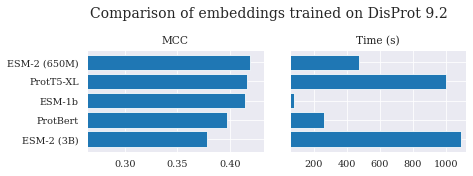

In [11]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
fig.tight_layout()

disprot_grouped = df_disprot.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, disprot_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, disprot_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on DisProt 9.2', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_disprot_important_metrics.png', bbox_inches='tight')
plt.show()

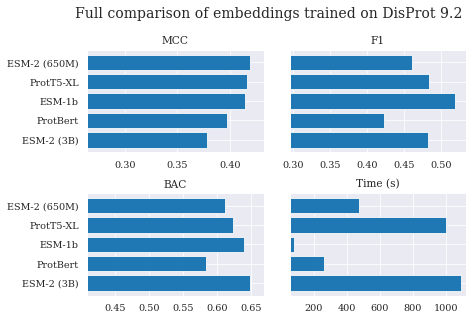

In [12]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), sharey=True)
fig.tight_layout(h_pad=2)

disprot_grouped = df_disprot.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, disprot_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, disprot_grouped, 'f1', 'F1', sort_m)
plot_metric(ax3, disprot_grouped, 'bac', 'BAC', sort_m)
plot_metric(ax4, disprot_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Full comparison of embeddings trained on DisProt 9.2', fontsize=14, y=1.1)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_disprot_metrics.png', bbox_inches='tight')
plt.show()

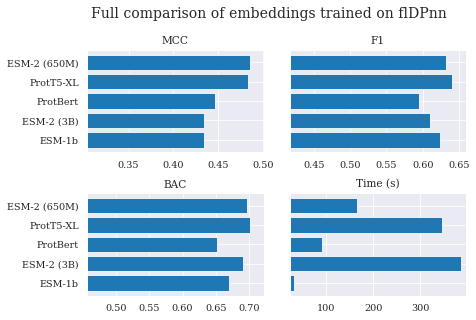

In [13]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), sharey=True)
fig.tight_layout(h_pad=2)

fldpnn_grouped = df_fldpnn.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, fldpnn_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, fldpnn_grouped, 'f1', 'F1', sort_m)
plot_metric(ax3, fldpnn_grouped, 'bac', 'BAC', sort_m)
plot_metric(ax4, fldpnn_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Full comparison of embeddings trained on flDPnn', fontsize=14, y=1.1)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_fldpnn_metrics.png', bbox_inches='tight')
plt.show()

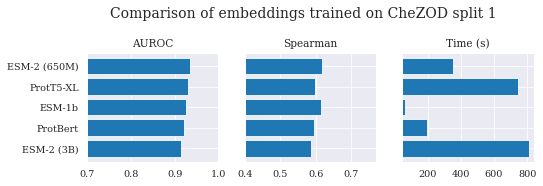

In [29]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod1_grouped = df_chezod1.groupby(by='config/model_name').mean()
sort_m = 'auroc'
plot_metric(ax1, chezod1_grouped, 'auroc', 'AUROC', sort_m)
ax1.set_xlim([0.7, 1])
plot_metric(ax2, chezod1_grouped, 'spearman', 'Spearman', sort_m)
ax2.set_xlim([0.4, 0.77])
plot_metric(ax3, chezod1_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on CheZOD split 1', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_chezod1_metrics.png', bbox_inches='tight')
plt.show()

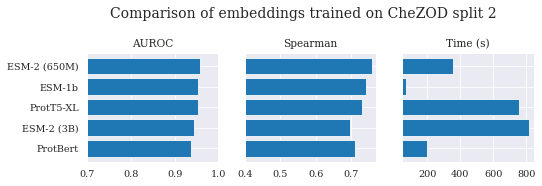

In [28]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod2_grouped = df_chezod2.groupby(by='config/model_name').mean()
sort_m = 'auroc'
plot_metric(ax1, chezod2_grouped, 'auroc', 'AUROC', sort_m)
ax1.set_xlim([0.7, 1])
plot_metric(ax2, chezod2_grouped, 'spearman', 'Spearman', sort_m)
ax2.set_xlim([0.4, 0.77])
plot_metric(ax3, chezod2_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on CheZOD split 2', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_chezod2_metrics.png', bbox_inches='tight')
plt.show()

# Fine-tune embeddings

Generate figures for the thesis to show training results of fine-tuned embeddings vs not fine tuned

In [30]:
df_fine_tune_disprot_esm1 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_disprot_esm1_again").results_df.dropna(subset=['loss'])
df_fine_tune_disprot_esm2 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_disprot_esm2").results_df.dropna(subset=['loss'])

df_fine_tune_chezod_esm1 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_chezod_esm1_fixed_auroc").results_df.dropna(subset=['loss'])
df_fine_tune_chezod_esm2 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_chezod_esm2_fixed_auroc").results_df.dropna(subset=['loss'])

In [31]:
df_fine_tune_disprot_esm1['model_name'] = 'facebook/esm-1b'
df_fine_tune_disprot_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_fine_tune_chezod_esm1['model_name'] = 'facebook/esm-1b'
df_fine_tune_chezod_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_fine_tune_disprot = pd.concat([df_fine_tune_disprot_esm1, df_fine_tune_disprot_esm2])
df_fine_tune_disprot['group_col'] = df_fine_tune_disprot['model_name'].str.cat(df_fine_tune_disprot['config/nr_frozen_epochs'].astype(int).astype(str), sep='-')

df_fine_tune_chezod = pd.concat([df_fine_tune_chezod_esm1, df_fine_tune_chezod_esm2])
df_fine_tune_chezod['group_col'] = df_fine_tune_chezod['model_name'].str.cat(df_fine_tune_chezod['config/nr_frozen_epochs'].astype(int).astype(str), sep='-')

In [32]:
df_fine_tune_disprot.groupby(by='group_col').mean()

,loss,acc,bac,mcc,f1,time_this_iter_s,done,training_iteration,timestamp,time_total_s,pid,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,config/nr_frozen_epochs
group_col,,,,,,,,,,,,,,,,
esm2_t33_650M_UR50D-1,0.780873,0.833845,0.685852,0.425203,0.518082,741.818539,1.0,10.833333,1.666239e+09,7784.096979,75481.666667,7784.096979,0.0,10.833333,0.005282,1.0
esm2_t33_650M_UR50D-30,0.403401,0.842199,0.625023,0.424734,0.478585,476.034240,1.0,10.500000,1.666245e+09,5022.338236,126310.250000,5022.338236,0.0,10.500000,0.005988,30.0
facebook/esm-1b-1,0.440676,0.812646,0.637784,0.412322,0.505568,81.511416,1.0,9.000000,1.666701e+09,762.616891,55167.800000,762.616891,0.0,9.000000,0.006280,1.0
facebook/esm-1b-30,0.418159,0.821993,0.621479,0.423002,0.508094,79.458075,1.0,7.600000,1.666698e+09,619.394964,56227.000000,619.394964,0.0,7.600000,0.005907,30.0


In [33]:
f_label_map = {
    "esm2_t33_650M_UR50D-1": "ESM-2",
    "esm2_t33_650M_UR50D-30": "ESM-2",
    "facebook/esm-1b-1": "ESM-1b",
    "facebook/esm-1b-30": "ESM-1b"
}

def plot_frozen_metric(ax, grouped_df, metric_col, metric_name, sort_metrics, min_c=0.7, max_c=1.03):
    width = 0.4
    sorted_df = grouped_df.sort_values(sort_metrics, ascending=False)
    items_fine_tuned = sorted_df[sorted_df['config/nr_frozen_epochs'] == 1][metric_col]
    items_frozen = sorted_df[sorted_df['config/nr_frozen_epochs'] == 30][metric_col]
    labels = [f_label_map[l] for l in items_fine_tuned.keys()]
    l1 = ax.barh(np.arange(len(items_fine_tuned)) - width/2, items_fine_tuned.values, width, label="Fine-tuned")
    l2 = ax.barh(np.arange(len(items_frozen)) + width/2, items_frozen.values, width, label="Frozen")
    ax.set_yticks(np.arange(len(items_frozen)), labels=labels)
    ax.set_title(metric_name)
    ax.set_xlim([min(items_frozen.values) * min_c, max(items_fine_tuned.values) * max_c])
    return l1, l2

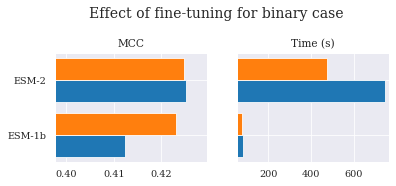

In [36]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

disprot_frozen_grouped = df_fine_tune_disprot.groupby(by='group_col').mean()
sort_m = ['group_col', 'mcc']
l1, l2 = plot_frozen_metric(ax1, disprot_frozen_grouped, 'mcc', 'MCC', sort_m, min_c=0.94, max_c=1.01)
plot_frozen_metric(ax2, disprot_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

#ax1.legend(handles=[l2, l1], loc='upper center', bbox_to_anchor=(1.1, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Effect of fine-tuning for binary case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_fine_tuning_disprot.png', bbox_inches='tight')
plt.show()

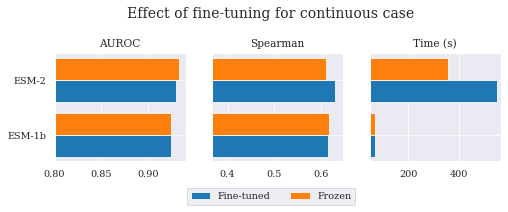

In [45]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod_frozen_grouped = df_fine_tune_chezod.groupby(by='group_col').mean()
sort_m = ['group_col', 'auroc']
ls = plot_frozen_metric(ax1, chezod_frozen_grouped, 'auroc', 'AUROC', sort_m)
ax1.set_xlim([0.8, 0.94])
plot_frozen_metric(ax2, chezod_frozen_grouped, 'spearman', 'Spearman', sort_m, min_c=0.6)
plot_frozen_metric(ax3, chezod_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

ax1.legend(handles=ls, loc='upper center', bbox_to_anchor=(1.65, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Effect of fine-tuning for continuous case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_fine_tuning_chezod.png', bbox_inches='tight')
plt.show()